In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [48]:
data1 = pd.read_csv('C:/Users/ADMIN/Desktop/인공지능/AI-class-main/AI-class-main/titanic.csv', index_col = 0)
df=pd.read_csv('C:/Users/ADMIN/Desktop/인공지능/AI-class-main/AI-class-main/titanic.csv')

In [49]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
df=df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [51]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [52]:
#Age 결측치를 중위값으로 채우기
data1['Age'].fillna(data1['Age'].median(), inplace = True)
## 결측치가 지나치게 많은 Feature 'Cabin' 삭제
data1.drop('Cabin', axis=1, inplace=True)
#Embarked 결측치를 최빈값으로 채우기
data1['Embarked'].fillna(data1['Embarked'].mode()[0], inplace = True)

In [53]:
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [54]:
#data1=data1.dropna()
#data1

In [55]:
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [56]:
a=data1.drop('Survived',axis=1)
a.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
b=data1['Survived']
b.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [58]:
data = pd.concat([a, b], axis=1)
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,0


In [59]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass')

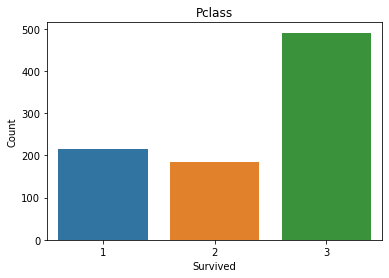

In [60]:
sns.countplot(data = data, x="Pclass")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Pclass")

In [61]:
# 2. 생존자와 사망자 총 숫자 및 차트표시
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived')

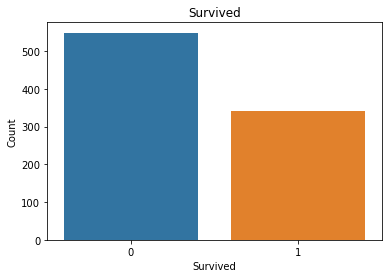

In [62]:
sns.countplot(data = data, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived")

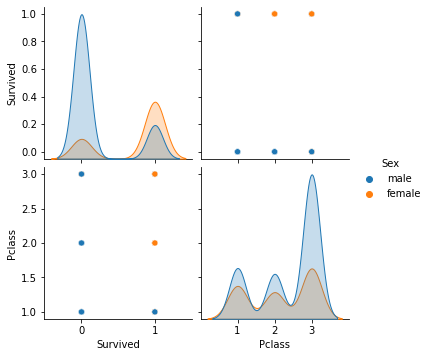

In [63]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
sns.pairplot(data,
             vars=['Survived', 'Pclass'],
            hue ='Sex')
plt.show()

In [64]:
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행


In [65]:
#Set x and y values
y=df.Survived.values
x_df5=df.drop(['Survived'],axis=1)
x_df4=x_df5.drop('Name',axis=1)
x_df3=x_df4.drop('Sex',axis=1)
x_df2=x_df3.drop('Ticket',axis=1)
x_df1=x_df2.drop('Cabin',axis=1)
x_df0=x_df1.drop('PassengerId',axis=1)
x_df=x_df0.drop('Embarked',axis=1)
#normalization
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [66]:
# train/test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('lr accuracy :', lr.score(x_test,y_test))

# confusion matrix
y_pred = lr.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)

lr accuracy : 0.7090909090909091


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('knn accuracy :',knn.score(x_test,y_test))
# confisioun matrix
y_pred = knn.predict(x_test)
y_true = y_test

# confisuon matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_true,y_pred)

knn accuracy : 0.6909090909090909


In [69]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print('svm accuracy :', svm.score(x_test,y_test))

# confisuon matrix
y_pred = svm.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

svm accuracy : 0.6727272727272727


In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print('dt.accuracy : ', dt.score(x_test,y_test))

# confisuon matrix
y_pred = dt.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

dt.accuracy :  0.6181818181818182


In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print('rf accuracy : ', rf.score(x_test,y_test))

# confision matrix
y_pred = rf.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

rf accuracy :  0.6909090909090909


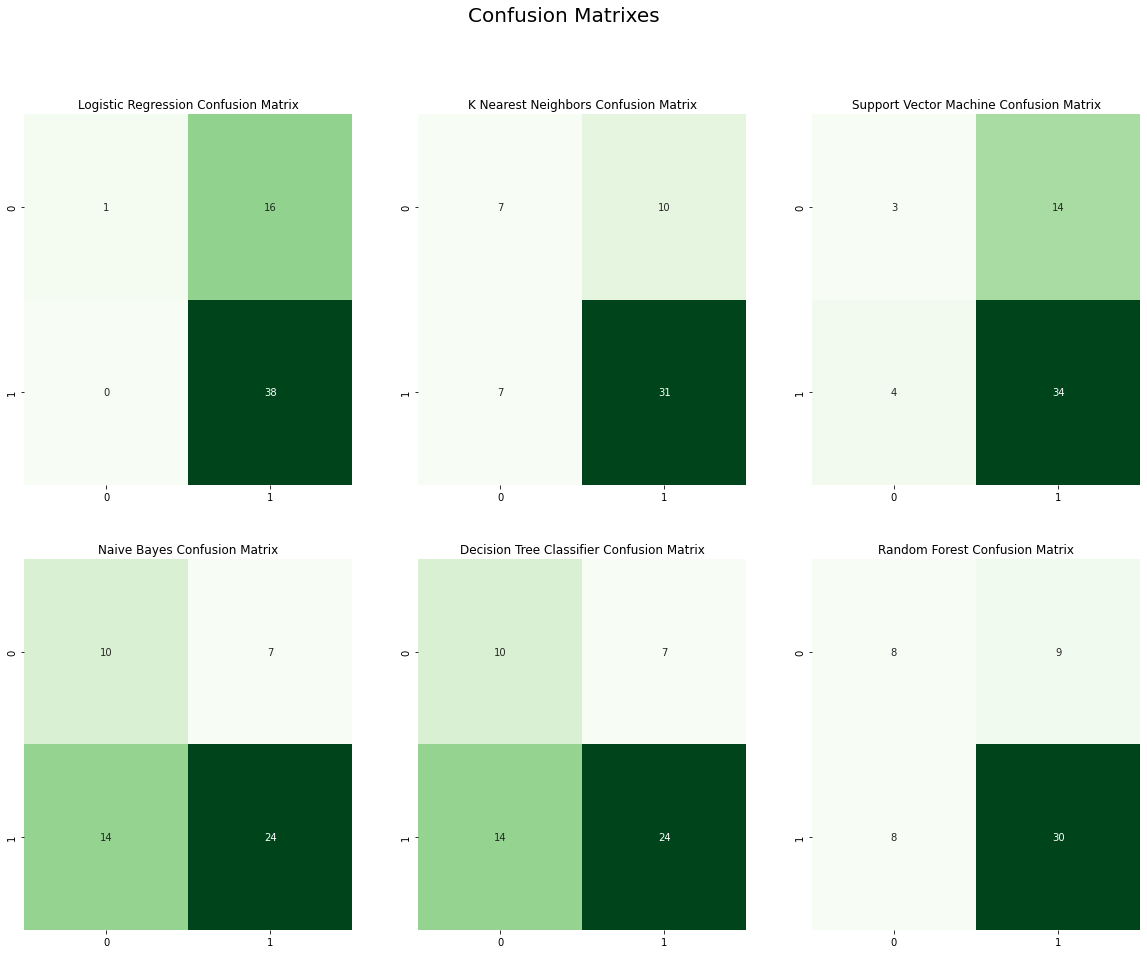

In [72]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.show()

In [ ]:
1.label의 개수와 그래프
2.class에 따른 hue분포(산점도)
3.class에 따른 color_intensity(산점도)
4.sns.pairplot이용해서 hue, color_intensity관계표시
5.class별 color_intensity의 값 범위표시(도전문제)

In [ ]:
# 결측치 제거
sns.set_theme(style="whitegrid")
sns.boxplot(x="color_intensity", data=data, palette="Set3")
plt.title("color_intensity")
plt.show()#사분위 (이상치,결측치 제거)

In [ ]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
# 2. 생존자와 사망자 총 숫자 및 차트표시
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행